<a href="https://colab.research.google.com/github/shreyanshsourabh/Music_Genre_Classification/blob/master/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.shape

(51054, 2)

In [ ]:
df.head()

,lyric,class
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51054 entries, 0 to 51053
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyric   51054 non-null  object
 1   class   51054 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 797.8+ KB


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['class'].value_counts()

0    28885
1    22169
Name: class, dtype: int64

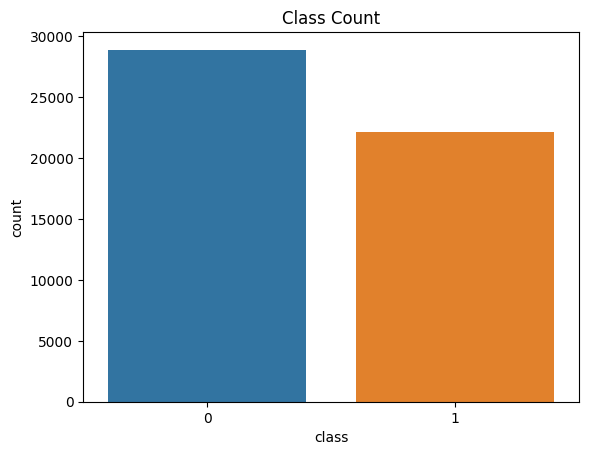

In [ ]:
sns.countplot(x=df['class'])
plt.title("Class Count")
plt.show()

# Texual Analysis

In [ ]:
#lowercasing

df['lyric'] = df['lyric'].str.lower()

In [ ]:
#removing tags

import re

def rem_tags(text):
    text = re.sub(r'<.*?>',' ',text)
    text = re.sub(r'https?://\s+[www\.\st]',' ',text)
    text = re.sub(r'[0-9]',' ',text)
    text = re.sub(r' +',' ',text)
    return text

df['lyric'] = df['lyric'].apply(rem_tags)

In [ ]:
# Removing punctuations

import string

def rem_punc(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['lyric'] = df['lyric'].apply(rem_punc)

In [ ]:
# Removing stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def rem_stw(text):
    n_text=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            n_text.append(word)
    x = n_text[:]
    n_text.clear()
    return " ".join(x)

df['lyric'] = df['lyric'].apply(rem_stw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,lyric,class
0,cant drink without thinkin,1
1,lil pump flyin private jet yuh,0
2,matter fact aint help money,0
3,could find aint hidin,0
4,way talk way move,1
...,...,...
51049,told pour went right blow blow,0
51050,hit ground crawl dresser,0
51051,keep breathin breathin breathin breathin,1
51052,go system long live king king,0


# Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df['lyric'])
X = tfidf.transform(df['lyric']).toarray()

In [ ]:
Y = df['class']

In [ ]:
print(X.shape, Y.shape)

(51054, 14107) (51054,)


# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.2, random_state=512)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(40843, 14107) (10211, 14107) (40843,) (10211,)


# Model Training

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(20,activation='relu'),
    layers.Dense(25,activation='relu'),
    layers.Dense(25,activation='relu'),
    layers.Dense(15,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = ['binary_accuracy'],
)

In [ ]:
history = model.fit(
    X_train,Y_train,
    batch_size = 1500,
    epochs =20,
)

Epoch 1/20
28/28 [==============================] - 7s 180ms/step - loss: 0.6782 - binary_accuracy: 0.5648
Epoch 2/20
28/28 [==============================] - 4s 134ms/step - loss: 0.6025 - binary_accuracy: 0.6141
Epoch 3/20
28/28 [==============================] - 4s 133ms/step - loss: 0.4850 - binary_accuracy: 0.8083
Epoch 4/20
28/28 [==============================] - 5s 175ms/step - loss: 0.3926 - binary_accuracy: 0.8476
Epoch 5/20
28/28 [==============================] - 4s 133ms/step - loss: 0.3398 - binary_accuracy: 0.8617
Epoch 6/20
28/28 [==============================] - 4s 134ms/step - loss: 0.3145 - binary_accuracy: 0.8705
Epoch 7/20
28/28 [==============================] - 4s 161ms/step - loss: 0.2970 - binary_accuracy: 0.8781
Epoch 8/20
28/28 [==============================] - 4s 146ms/step - loss: 0.2829 - binary_accuracy: 0.8842
Epoch 9/20
28/28 [==============================] - 4s 134ms/step - loss: 0.2701 - binary_accuracy: 0.8909
Epoch 10/20
28/28 [==================

In [ ]:
import pickle

pickle.dump(model,open('music_genre_model.pkl','wb'))
pickle.dump(tfidf,open('music_genre_vectorizer.pkl','wb'))